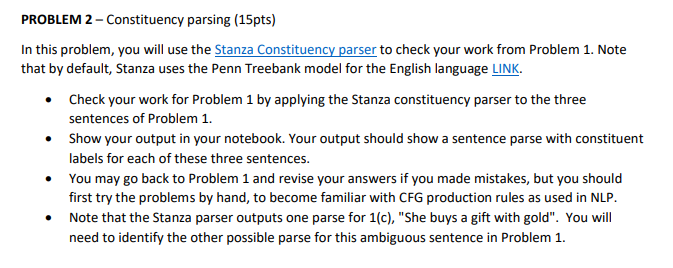

In [2]:
!pip install stanza

In [4]:
import stanza

In [7]:
stanza_pipeln = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency')

# Below are the sentences given in the Problem 1
given_sentences = ['Lucy plays with friends','This movie is careless and unfocused','She buys a gift with gold']

# Applying the Stanza constituency parser to the three sentences of Problem 1
for texts in given_sentences:
    doc = stanza_pipeln(texts)
    for sentence in doc.sentences:
          print(texts," - this sentence is parsed as below :\n")
          # we will use pretty_print to print the parses with indention and line wise
          print(sentence.constituency.pretty_print())
          print("-----------------------------------------------------------------------")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| constituency | ptb3-revised_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: constituency
INFO:stanza:Done loading processors!


Lucy plays with friends  - this sentence is parsed as below :

(ROOT
  (S
    (NP (NNP Lucy))
    (VP
      (VBZ plays)
      (PP
        (IN with)
        (NP (NNS friends))))))

-----------------------------------------------------------------------
This movie is careless and unfocused  - this sentence is parsed as below :

(ROOT
  (S
    (NP (DT This) (NN movie))
    (VP
      (VBZ is)
      (ADJP (JJ careless) (CC and) (JJ unfocused)))))

-----------------------------------------------------------------------
She buys a gift with gold  - this sentence is parsed as below :

(ROOT
  (S
    (NP (PRP She))
    (VP
      (VBZ buys)
      (NP (DT a) (NN gift))
      (PP
        (IN with)
        (NP (NN gold))))))

-----------------------------------------------------------------------


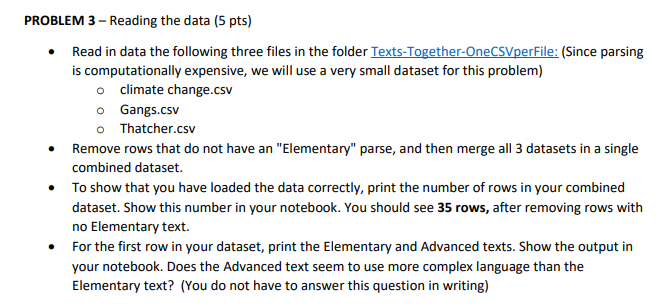

In [9]:
import pandas as pd
import os

# List of file paths for the datasets
# Assuming files are in the Python workspace
file_paths_problem_3 = [
    '/content/climate change .csv',
    '/content/Gangs.csv',
    '/content/Thatcher.csv'
]

# Read the datasets from the Texts-Together-OneCSVperFile folder
# Using os.path.join as recommended in previous assignments
dataframes_problem_3 = [pd.read_csv(os.path.join(file), encoding='ISO-8859-1') for file in file_paths_problem_3]

# lets Remove rows with NaN values in the "Elementary" column
filtered_dataframes_problem_3 = [df.dropna(subset=['Elementary']) for df in dataframes_problem_3]

# here, we Combine all three datasets into one
combined_dataset_problem_3 = pd.concat(filtered_dataframes_problem_3, ignore_index=True)

# finally, Print the number of rows in the combined dataset
print(f"Number of rows in the combined dataset: {len(combined_dataset_problem_3)}")
print("\n")

# at last, we will print the Elementary and Advanced texts for the  very first row
if not combined_dataset_problem_3.empty:
    first_row_problem_3 = combined_dataset_problem_3.iloc[0]
    print(f"Elementary Text:\n{first_row_problem_3['Elementary']}\n")
    print(f"Advanced Text:\n{first_row_problem_3['Advanced']}")


Number of rows in the combined dataset: 35


Elementary Text:
Poorer countries will be most affected
by climate change in the next century.
Sea levels will rise, there will be stronger
cyclones, warmer days and nights, more
rainfall, and larger and longer heatwaves,
says a new report.

Advanced Text:
Low-income countries will remain on the front
line of human-induced climate change over the
next century, experiencing gradual sea-level
rises, stronger cyclones, warmer days and
nights, more unpredictable rainfall, and larger
and longer heatwaves, according to the most
thorough assessment of the issue yet.


The advanced text seems to use more complex language.For example, Elementary text - "Poorer countries will be most affected is quite simple and straight forward". Whereas, Advanced text - "Low-income countries will remain on the front". This sentence has a complex subject Low-income countries and the meaning and the implications of "remain on the front" makes it  more nuanced than an elementary sentence


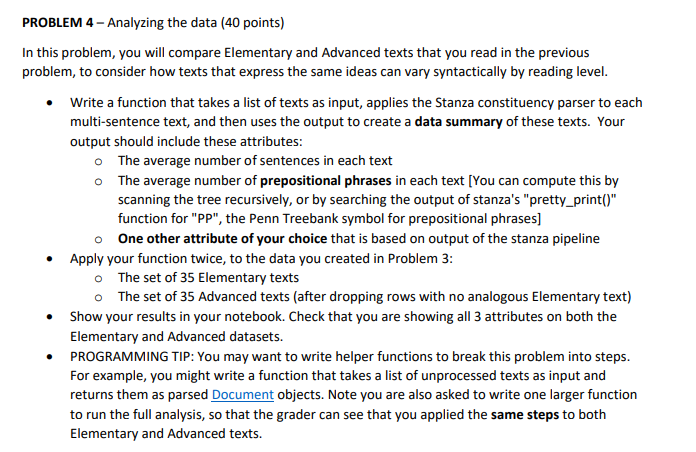

In [12]:
# Initialize the English constituency parser
constituency_parser = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency')

# Function tokenize_and_parse takes a list of multi-sentence texts
# and applies the Stanza constituency parser to each of these texts
def tokenize_and_parse(texts):
    parsed_texts = []
    for text in texts:
        # Applies the Stanza constituency parser
        document = constituency_parser(text)
        parsed_texts.append(document)
    return parsed_texts

# Function count_specific_tags counts the number of occurrences of a specific tag
# such as - VP, PP in a parsed text
def count_specific_tags(tag, parsed_texts):
    tag_count = 0
    for text in parsed_texts:
        for sentence in text.sentences:
            tag_count += str(sentence.constituency).count(tag)
    return tag_count

# Function analyze_parsed_texts takes parsed texts as input and
# creates a data summary of these texts
def analyze_parsed_texts(parsed_texts):
    # I have considered 4 attributes here:
    num_sentences = [len(text.sentences) for text in parsed_texts] #average number of sentences in each text,
    num_pp_phrases = count_specific_tags('PP', parsed_texts) # average number of prepositional phrases in each text, and
    num_verbs = count_specific_tags('VP', parsed_texts) # new attribute average number of verb phrases in each text, and
    num_noun_phrases = count_specific_tags('NP', parsed_texts) # new attribute average number of Noun phrases in each text, and

    # Creating a data summary
    summary = {
        'Average Sentences': sum(num_sentences) / len(parsed_texts),
        'Average PP Phrases': num_pp_phrases / len(parsed_texts),
        'Average VP Phrases': num_verbs / len(parsed_texts),
        'Average NP Phrases': num_noun_phrases / len(parsed_texts)
    }

    return summary

# Function analyze_text_dataset combines all the processes
# Takes a dataset of texts and parses each text
# Analyzes the parsed texts to return an overall summary
def analyze_text_dataset(dataset):
    # Applying the tokenize_and_parse function to parse the dataset
    dataset_parsed_texts = tokenize_and_parse(dataset)

    # Applying the analyze_parsed_texts function to the parsed Elementary and Advanced datasets
    dataset_summary = analyze_parsed_texts(dataset_parsed_texts)

    return dataset_summary

elementary_texts_dataset = combined_dataset_problem_3["Elementary"]
advanced_texts_dataset = combined_dataset_problem_3["Advanced"]

# Analyzing the Elementary and Advanced datasets
elementary_summary = analyze_text_dataset(elementary_texts_dataset)
advanced_summary = analyze_text_dataset(advanced_texts_dataset)

# Printing the results
print("Elementary Texts Summary:")
print(elementary_summary)

print("\nAdvanced Texts Summary:")
print(advanced_summary)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| constituency | ptb3-revised_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: constituency
INFO:stanza:Done loading processors!


Elementary Texts Summary:
{'Average Sentences': 3.2285714285714286, 'Average PP Phrases': 4.857142857142857, 'Average VP Phrases': 12.771428571428572, 'Average NP Phrases': 22.057142857142857}

Advanced Texts Summary:
{'Average Sentences': 3.1142857142857143, 'Average PP Phrases': 6.942857142857143, 'Average VP Phrases': 15.17142857142857, 'Average NP Phrases': 26.571428571428573}
